### Pr√©paration et nettoyage des donn√©es

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 169.6/169.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.3-py3-none-any.whl size=200466 sha256=6fdb41dc4ec76026f70a25fa8912f31a216afb39fd3a963bedd63375cc7536bb
  Stored in directory: /root/.cache/pip/wheels/2d/60/5b/f74eccd2c9c892a2c298202ca510f10995f9940647fcc2d97f
Successfully built pyod
Initial DataFrame shape: (45672, 16)

Column-wise Missing Values:
 Identifiant               0
date_accident             0
date_communication        0
age                       0
sexe                      0
status_marital           24
enfants                   0
autre_dep                 0
salaire_semaine           0
patrimoine            37346
type_emploi               0
heure_par_semaine         0
jour_par_semaine          0
description               0
cout_init                 0
cout_ultime               0
dtyp

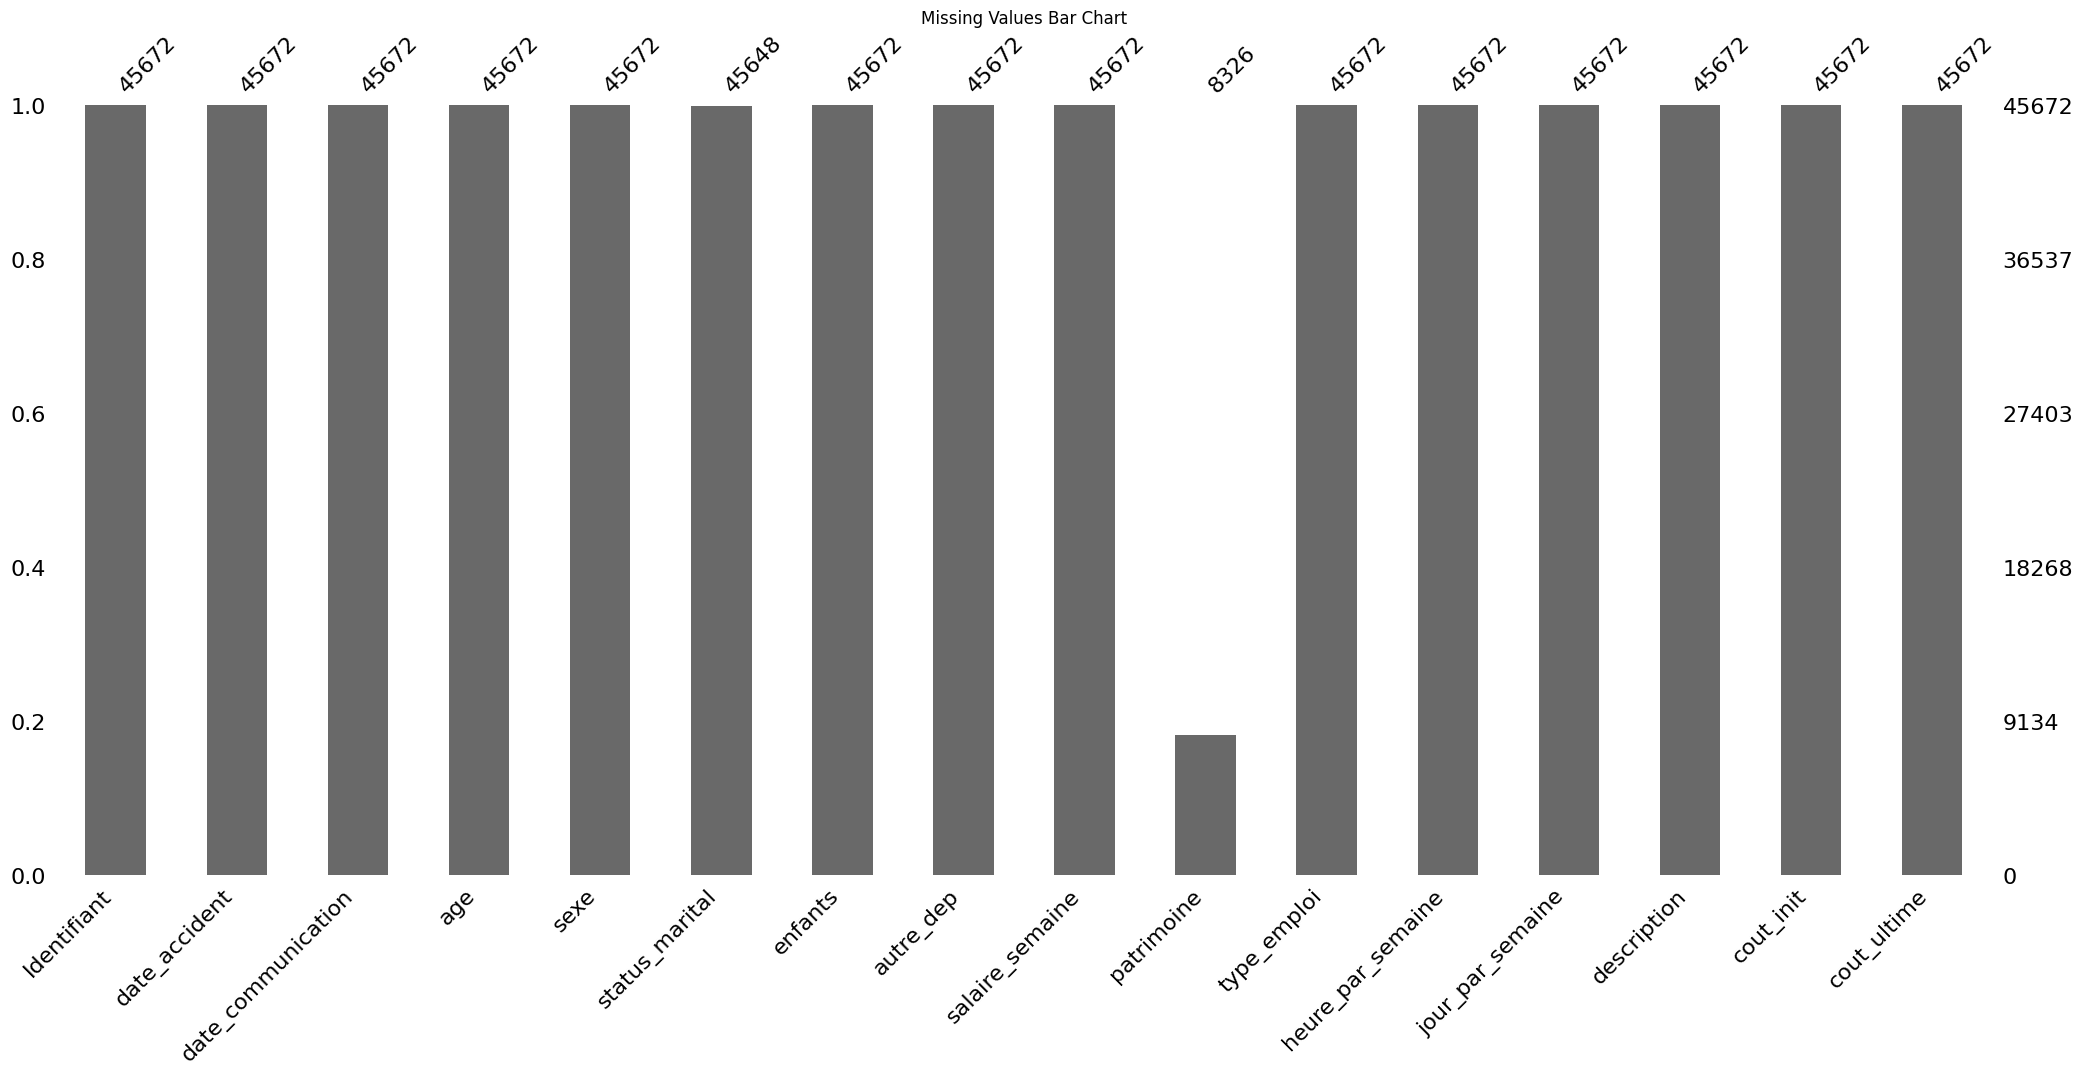

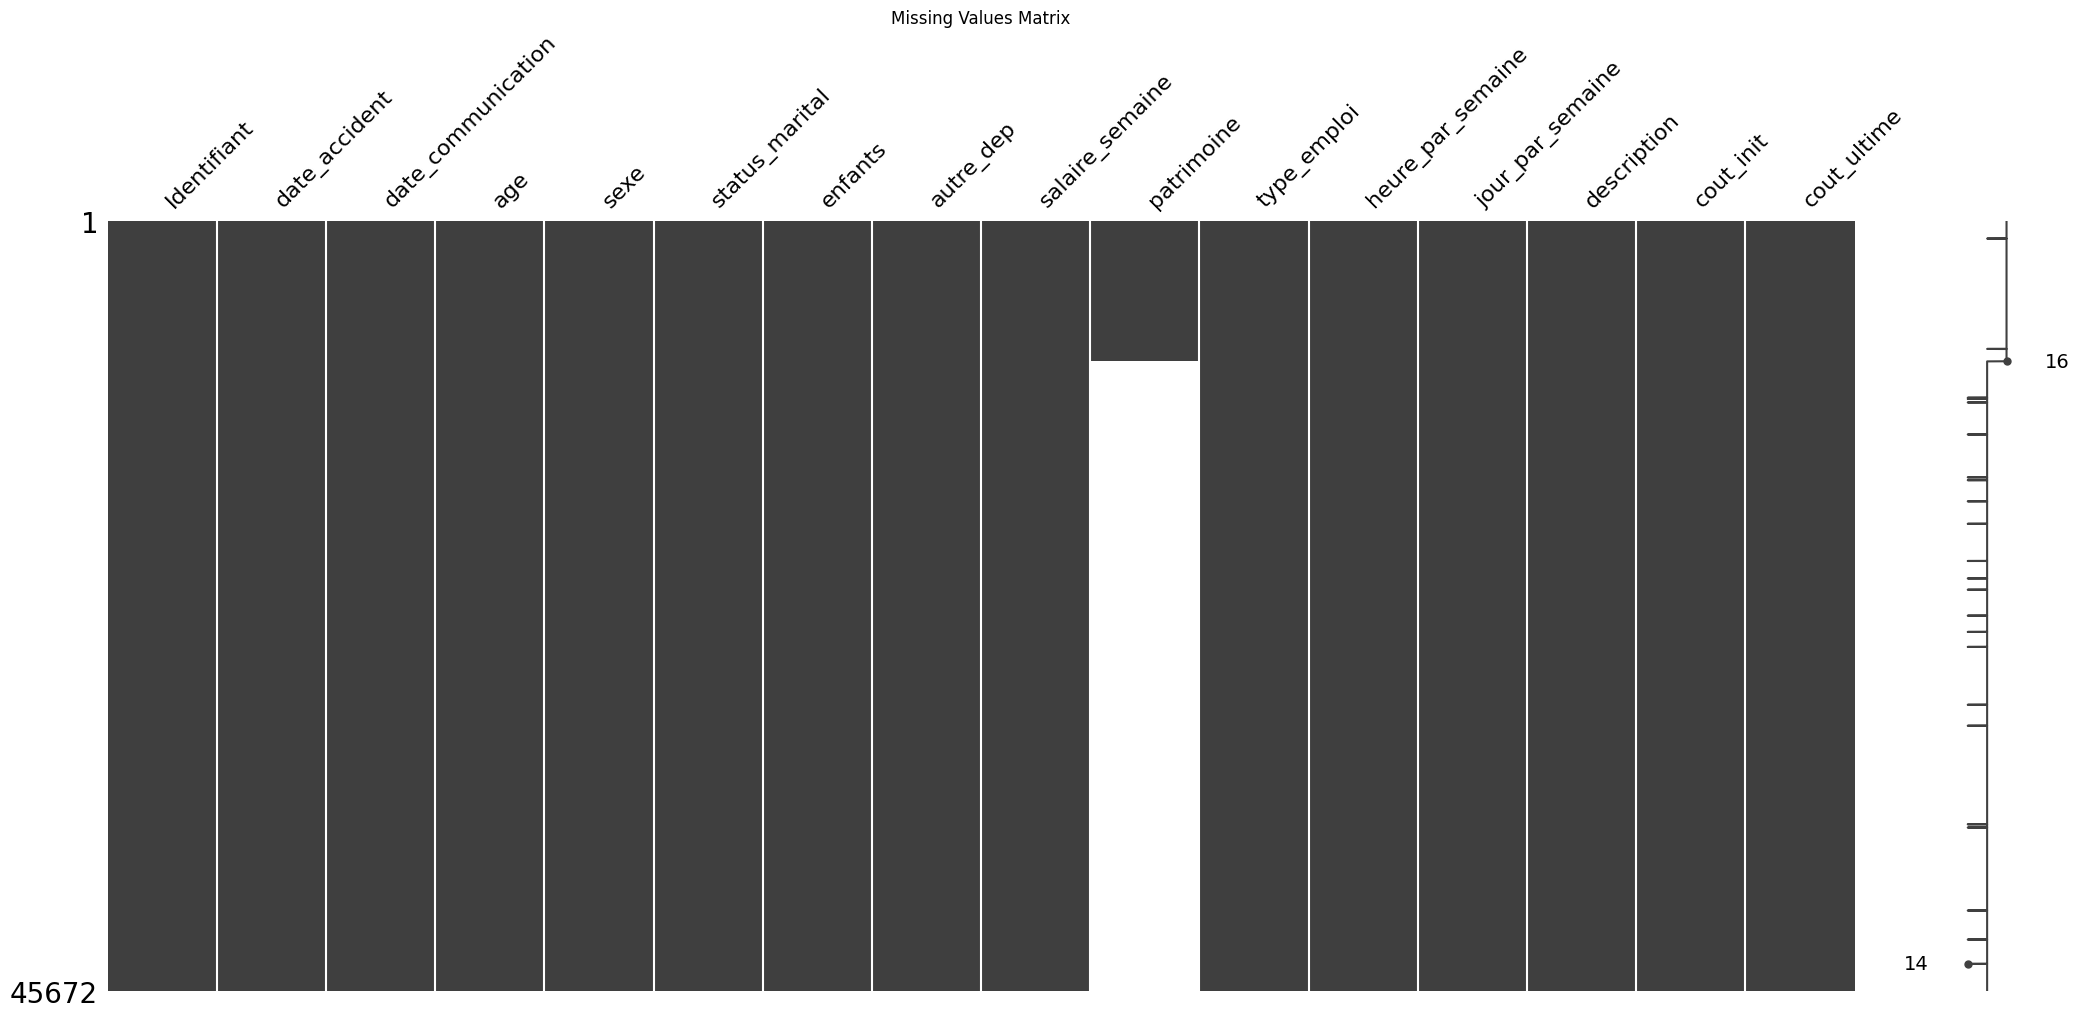

<ipython-input-1-231f7f3a82fa>:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-1-231f7f3a82fa>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd


DataFrame shape after missing value imputation: (45672, 16)
Missing Values after imputation:
 Identifiant           0
date_accident         0
date_communication    0
age                   0
sexe                  0
status_marital        0
enfants               0
autre_dep             0
salaire_semaine       0
patrimoine            0
type_emploi           0
heure_par_semaine     0
jour_par_semaine      0
description           0
cout_init             0
cout_ultime           0
dtype: int64

Number of Outliers Detected: 20100
DataFrame shape after outlier removal: (25572, 16)

Number of Outliers Detected by PYOD IForest: 4568


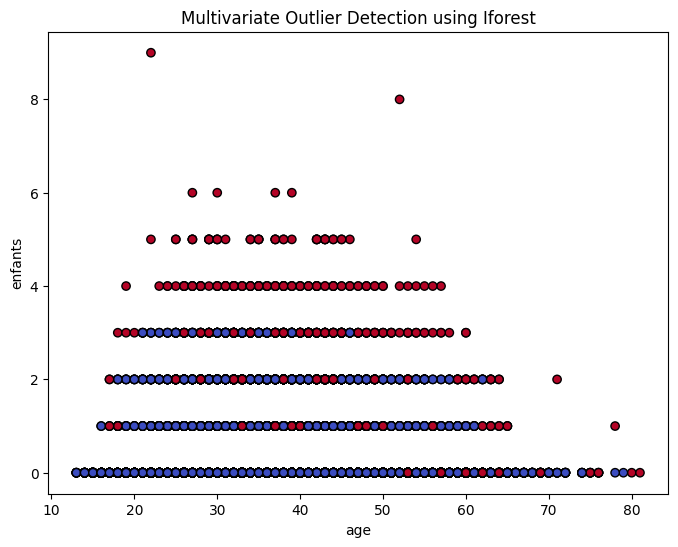

DataFrame shape after outlier removal: (41104, 16)


<Figure size 1200x800 with 0 Axes>

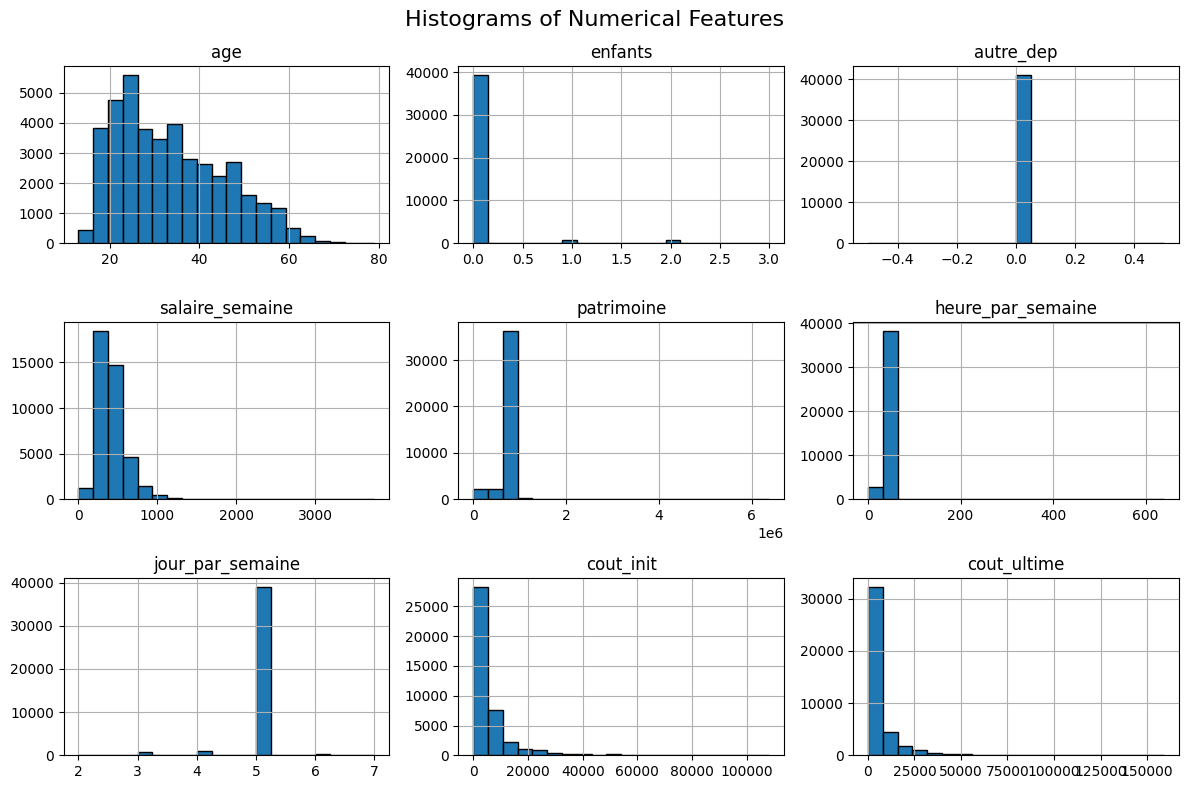

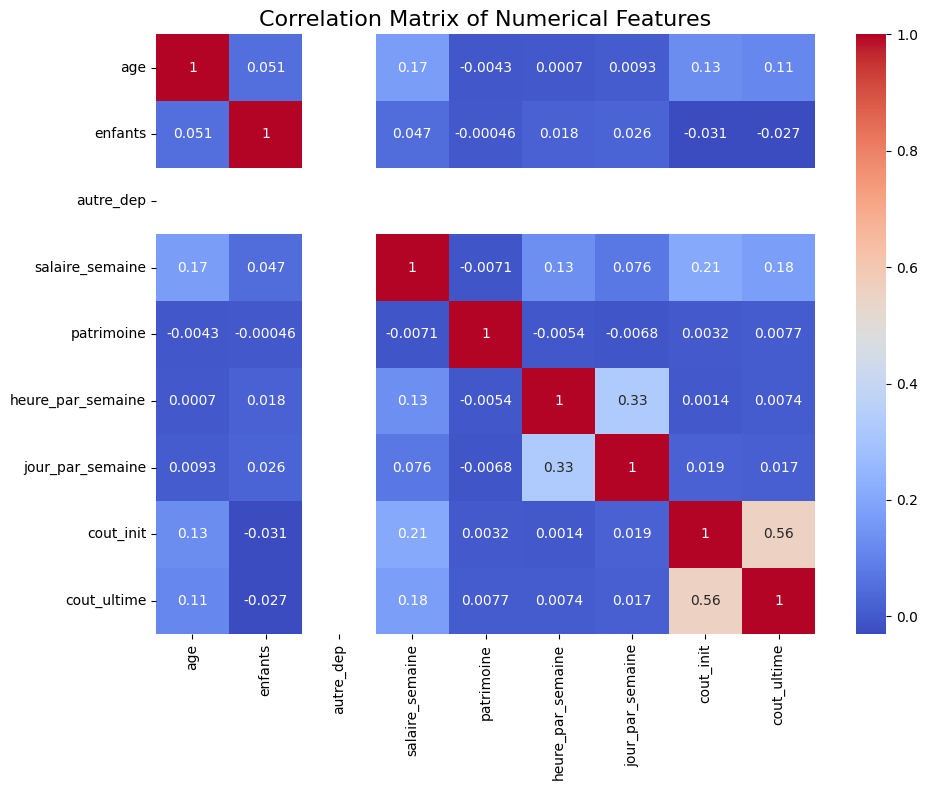

In [1]:
# √âTAPE PR√âLIMINAIRE : Importation des biblioth√®ques essentielles √† notre analyse

import pandas as pd  # Permet de manipuler les donn√©es sous forme de DataFrame
import numpy as np  # Permet les calculs num√©riques matriciels
import seaborn as sns  # Permet une visualisation avanc√©e des donn√©es
import matplotlib.pyplot as plt  # Permet de g√©n√©rer des graphiques simples
from io import StringIO  # Utilis√© pour manipuler du texte en m√©moire
import plotly.express as px  # Permet une visualisation interactive
import plotly.graph_objects as go  # Permet de g√©n√©rer des graphiques interactifs complexes
from sklearn.model_selection import train_test_split  # Pour s√©parer des donn√©es en jeu d'entra√Ænement et de test
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Permet l‚Äôencodage des variables cat√©goriques et normalisation
from sklearn.compose import ColumnTransformer  # Permet la transformation des colonnes en pipeline
from sklearn.linear_model import LinearRegression  # Permet d‚Äôeffectuer des r√©gressions lin√©aires
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Permet une r√©gression avec arbres de d√©cision
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Algorithmes d‚Äôensemble pour am√©liorer la pr√©cision et la robustesse des mod√®les
from sklearn.pipeline import Pipeline  # Permet la cr√©ation de pipelines de traitement
from sklearn.metrics import mean_squared_error, r2_score  # Permet d‚Äô√©valuer la qualit√© des mod√®les
import statsmodels.api as sm  # Permet une analyse statistique avanc√©e
from sklearn.inspection import partial_dependence, PartialDependenceDisplay  # Permet de visualiser l'effet des variables
import time  # Gestion du temps d'ex√©cution
import missingno as msno  # Pour visualiser des valeurs manquantes

# Importation de la biblioth√®que pour la d√©tection et le traitement des anomalies
!pip install pyod  # Ex√©cuter cette commande dans le terminal pour installer la biblioth√®que
from pyod.models.iforest import IForest  # Importation du mod√®le Isolation Forest pour le traitement des donn√©es extr√™mes
from scipy.stats import probplot  # Pour visualiser des distributions statistiques

# ETAPE 1 : CHARGEMENT ET VISUALISATION DU DATAFRAME

# Chargement du fichier Excel en pr√©cisant la feuille de calcul
df = pd.read_excel('/content/train_etu.xlsx')

# Affichage de la taille initiale du DataFrame (nombre de lignes et colonnes)
print("Initial DataFrame shape:", df.shape)

# Affichage du nombre de valeurs manquantes par colonne
print("\nColumn-wise Missing Values:\n", df.isnull().sum())

# VISUALISATION DES DONN√âES MANQUANTES
# Graphe des valeurs manquantes par colonne
msno.bar(df)
plt.title("Missing Values Bar Chart")
plt.show()

# Matrice des valeurs manquantes : permet de voir la distribution des NaN
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# TRAITEMENT DES DONN√âES MANQUANTES
# S√©lection des colonnes num√©riques
num_cols = df.select_dtypes(include=[np.number]).columns

# Remplacement des valeurs manquantes des colonnes num√©riques par la moyenne de chaque colonne
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# S√©lection des colonnes cat√©goriques
cat_cols = df.select_dtypes(include=['object']).columns

# Remplacement des valeurs manquantes des colonnes cat√©goriques par la valeur la plus fr√©quente
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Affichage de la taille du DataFrame apr√®s le traitement des valeurs manquantes
print("\nDataFrame shape after missing value imputation:", df.shape)

# V√©rification que toutes les valeurs manquantes ont √©t√© trait√©es
print("Missing Values after imputation:\n", df.isnull().sum())

# ETAPE 2 : DETECTION DES VALEURS ABERRANTES

# D√©tection des valeurs aberrantes avec la m√©thode de l'IQR (Interquartile Range)
Q1 = df[num_cols].quantile(0.25)  # Premier quartile
Q3 = df[num_cols].quantile(0.75)  # Troisi√®me quartile
IQR = Q3 - Q1  # Intervalle interquartile

# D√©tection des valeurs extr√™mes en utilisant 1.5 * IQR comme r√©f√©rence
outlier_mask = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
outliers_present = outlier_mask.any(axis=1)  # Identification des lignes contenant au moins une valeur aberrante

# Affichage du nombre total de valeurs aberrantes d√©tect√©es
print("\nNumber of Outliers Detected:", outliers_present.sum())

# Cr√©ation d'un DataFrame nettoy√© sans les valeurs extr√™mes
df_clean = df[~outliers_present]
print("DataFrame shape after outlier removal:", df_clean.shape)

# D√©tection des valeurs aberrantes avec Isolation Forest cette fois
X_numeric = df[num_cols]  # S√©lection des colonnes num√©riques

# Initialisation du mod√®le IForest avec 10% d‚Äôoutliers (supposition de valeurs extr√™mes)
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X_numeric)  # Entra√Ænement du mod√®le

# Extraction des labels de valeurs aberrantes (1 = outlier, 0 = normal)
outlier_labels = clf.labels_

# Comptage des outliers d√©tect√©s par l'Iforest
outliers_present = (outlier_labels == 1)
print("\nNumber of Outliers Detected by PYOD IForest:", outliers_present.sum())

# Visualisation des outliers dans un graphique 2D
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_numeric[num_cols[0]], X_numeric[num_cols[1]], c=outlier_labels, cmap='coolwarm', edgecolor='k')
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title("Multivariate Outlier Detection using Iforest")
    plt.show()

# Suppression des outliers d√©tect√©s
df_clean = df[~outliers_present]
print("DataFrame shape after outlier removal:", df_clean.shape)

# ETAPE 3 : VISUALISATION DES DISTRIBUTIONS DES VARIABLES NUMERIQUES
plt.figure(figsize=(12, 8))
df_clean[num_cols].hist(bins=20, edgecolor='black', figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# ETAPE 4 : ANALYSE DE CORRELATION ENTRE VARIABLES
plt.figure(figsize=(10, 8))
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# ETAPE 5 : VISUALISATION INTERACTIVE AVEC PLOTLY
# Histogramme interactif de l'√¢ge
fig_age = px.histogram(df_clean, x="age", nbins=10, title="Age Distribution (Plotly)")
fig_age.show()

# Matrice de corr√©lation interactive avec Plotly
fig_corr = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1
))
fig_corr.update_layout(title="Correlation Matrix (Plotly)", xaxis_nticks=36)
fig_corr.show()


### Feature engineering

In [2]:
df = df_clean
# Utilisation de la colonne Identifiant comme index
df = df.set_index('Identifiant')

# Suppression des variables patrimoine et autre_dep qui contiennent trop d'erreurs
df.drop(['patrimoine', 'autre_dep'], axis=1, inplace=True)

# Traitement de la variable description √† l'aide d'un package d'analyse de texte
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['description'])

# Conversion des variables date en format "datetime"
df['date_accident'] = pd.to_datetime(df['date_accident'])
df['date_communication'] = pd.to_datetime(df['date_communication'])

# Encodage des variables cat√©gorielles
df['homme'] = (df['sexe'] == 'M').astype('category')
# df['type_emploi'] = (df['type_emploi'] == 'F').astype('category')
df['date_diff'] = (df['date_communication'] - df['date_accident']).dt.days
# df = pd.get_dummies(df, columns=['status_marital', 'type_emploi'], drop_first=True)
df['log_cout_init'] = np.log(df['cout_init'])
df['date_diff'] = (df['date_communication'] - df['date_accident']).dt.days

# Formes au carr√© pour les variables age et cout_init, qui pr√©sentent le plus de corr√©lation avec cout_ultime
df['cout_init2'] = df['cout_init']**2
df['age2'] = df['age']**2

# Termes d'interactions pour les variables temporelles
df['salaire_semaine_x_cout_init'] = df['salaire_semaine'] * df['cout_init']
df['hj_par_semaine']=df['heure_par_semaine']*df['jour_par_semaine']
df['heure_par_jour'] = df['heure_par_semaine'] / df['jour_par_semaine']

# Termes d'interactions pour les variables le plus corr√©l√©es avec cout_ultime
df['cout_init_par_jour'] = df['cout_init'] / df['jour_par_semaine']
df['age_x_cout_init'] = df['age'] * df['cout_init']

# Ajout de variables suppl√©mentaires pour les dates
df['mois_accident'] = df['date_accident'].dt.month
df['jour_semaine_accident'] = df['date_accident'].dt.weekday  # Lundi=0, Dimanche=6
df['weekend_accident'] = (df['jour_semaine_accident'] >= 5).astype(int)
df['delai_communication'] = (df['date_communication'] - df['date_accident']).dt.days

# Supression de "sexe" car encod√© comme variable cat√©gorielle
df.drop(['sexe'], axis=1, inplace=True)

### Pr√©paration pour la r√©gression

In [3]:
# S√©paration des variables explicatives et de la variable endog√®ne¬†:
X = df.drop(columns=['cout_ultime','description']) # On supprime la colonne ¬´¬†cout_ultime¬†¬ª et ¬´¬†description¬†¬ª
y = df['cout_ultime'] # On d√©termine la variable endog√®ne que nous voulons pr√©dire

# Identification des colonnes num√©riques et cat√©goriques¬†:
numeric_features = X.select_dtypes(include=np.number).columns.tolist() # On s√©lectionne uniquement les colonnes contenant des valeurs num√©riques
categorical_features = X.select_dtypes(include=['object']).columns.tolist() # On s√©lectionne uniquement les colonnes contenant du texte/cat√©gories

# Pr√©traitement des donn√©es (normalisation et encodage des variables)¬†:
preprocessor = ColumnTransformer(
  transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(drop='first'), categorical_features)
  ]) # Normalisation des variables num√©riques avec StandardScaler (moyenne=0, √©cart-type=1) et transformation des variables cat√©goriques avec OneHotEncoder (cr√©ation de variables binaires), ¬´¬†drop='first'¬†¬ª √©vite la redondance.

# Division des donn√©es en ensemble d'entra√Ænement et de test¬†:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # On r√©serve 20¬†% des donn√©es pour le test et on s‚Äôassure que la r√©partition soit la m√™me pour chaque ex√©cution avec ¬´¬†random_state=42¬†¬ª

# Initialisation des dictionnaires pour stocker les r√©sultats¬†:
results = {} # Dictionnaire pour stocker les scores des mod√®les (MSE, R¬≤,...)
inference_times = {} # Dictionnaire pour stocker les temps de pr√©diction/inf√©rence des mod√®les

### R√©gresssion lin√©aire: premier mod√®le

In [4]:
# Cr√©ation d'un pipeline pour la r√©gression lin√©aire :
linear_regression_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # Transformation des donn√©es (normalisation et encodage)
    ('regressor', LinearRegression()) # Mod√®le de r√©gression lin√©aire
])

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement¬†:
linear_regression_pipe.fit(X_train, y_train) # Le mod√®le apprend √† pr√©dire ¬´¬†cout_ultime¬†¬ª

# Pr√©diction sur l'ensemble des donn√©es de test et mesure du temps d'ex√©cution :
start_time = time.time() # On d√©marre le chronom√®tre
y_pred_lr = linear_regression_pipe.predict(X_test) # Pr√©dictions sur les nouvelles donn√©es
end_time = time.time() # On arr√™te le chronom√®tre
inference_time_lr = end_time - start_time # On enregistre le temps total de pr√©diction

# √âvaluation du mod√®le avec RMSE :
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) # Calcul de l'erreur quadratique moyenne

# Stockage des r√©sultats et du temps d'inf√©rence¬†:
results["Linear Regression"] = (linear_regression_pipe, rmse_lr, y_pred_lr) # Stocke le mod√®le entra√Æn√©, l'erreur RMSE et les pr√©dictions
inference_times["Linear Regression"] = inference_time_lr # Stocke le temps d'inf√©rence du mod√®le


### Decision tree regressor

In [5]:
# Cr√©ation d'un pipeline pour un arbre de d√©cision :
decision_tree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # Transformation des donn√©es (normalisation et encodage)
    ('regressor', DecisionTreeRegressor(random_state=42)) # Mod√®le d'arbre de d√©cision
])

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement :
decision_tree_pipe.fit(X_train, y_train)

# Pr√©diction sur l'ensemble des donn√©es de test et mesure du temps d'ex√©cution¬†:
start_time = time.time() # D√©marre le chronom√®tre
y_pred_dt = decision_tree_pipe.predict(X_test) # Pr√©dictions sur les donn√©es de test
end_time = time.time() # Arr√™te le chronom√®tre
inference_time_dt = end_time - start_time # Enregistre le temps total de pr√©diction

# √âvaluation du mod√®le avec RMSE¬†:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt)) # Calcul de l'erreur quadratique moyenne

# Stockage des r√©sultats et du temps d'inf√©rence
results["Decision Tree"] = (decision_tree_pipe, rmse_dt, y_pred_dt) # Stocke le mod√®le entra√Æn√©, l'erreur RMSE et les pr√©dictions
inference_times["Decision Tree"] = inference_time_dt # Stocke le temps d'inf√©rence du mod√®le


### Random forest

In [6]:
# Cr√©ation d'un pipeline pour un Random Forest¬†:
random_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # Pr√©traitement des donn√©es (normalisation et encodage)
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=500)) # Mod√®le Random Forest avec 500 arbres de d√©cision
])

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement¬†:
random_forest_pipe.fit(X_train, y_train)

# Pr√©diction sur l'ensemble des donn√©es de test et mesure du temps d'ex√©cution¬†:
start_time = time.time() # D√©marre le chronom√®tre
y_pred_rf = random_forest_pipe.predict(X_test) # Pr√©dictions sur les donn√©es de test
end_time = time.time() # Arr√™te le chronom√®tre
inference_time_rf = end_time - start_time # Enregistre le temps total de pr√©diction

# √âvaluation du mod√®le avec RMSE¬†:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf)) # Calcul de l'erreur quadratique moyenne

# Stockage des r√©sultats et du temps d'inf√©rence :
results["Random Forest"] = (random_forest_pipe, rmse_rf, y_pred_rf) # Stocke le mod√®le entra√Æn√©, l'erreur RMSE et les pr√©dictions
inference_times["Random Forest"] = inference_time_rf # Stocke le temps d'inf√©rence du mod√®le

### Gradient boosting

In [7]:
# Cr√©ation d'un pipeline pour un Gradient Boosting Regressor¬†:
gradient_boosting_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # Transformation des donn√©es (normalisation et encodage)
    ('regressor', GradientBoostingRegressor(random_state=42, n_estimators=500)) # Mod√®le Gradient Boosting avec 500 arbres
])

# Entra√Ænement du mod√®le sur les donn√©es d'entra√Ænement¬†:
gradient_boosting_pipe.fit(X_train, y_train)

# Pr√©diction sur l'ensemble des donn√©es de test et mesure du temps d'ex√©cution¬†:
start_time = time.time() # D√©marre le chronom√®tre
y_pred_gb = gradient_boosting_pipe.predict(X_test) # Pr√©dictions sur les donn√©es de test
end_time = time.time() # Arr√™te le chronom√®tre
inference_time_gb = end_time - start_time # Enregistre le temps total de pr√©diction

# √âvaluation du mod√®le avec RMSE :
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Stockage des r√©sultats et du temps d'inf√©rence¬†:
results["Gradient Boosting"] = (gradient_boosting_pipe, rmse_gb, y_pred_gb) # Stocke le mod√®le entra√Æn√©, l'erreur RMSE et les pr√©dictions
inference_times["Gradient Boosting"] = inference_time_gb # Stocke le temps d'inf√©rence du mod√®le

### Mesures d'erreurs utilis√©es

Pour √©valuer la performance de nos diff√©rents mod√®les de r√©gression lin√©aire, nous utiliserons deux mesures d‚Äôerreur compl√©mentaires : le Root Mean Squared Error (RMSE) et le coefficient de d√©termination (R¬≤).

Le RMSE est une mesure couramment utilis√©e qui √©value l‚Äô√©cart-type des r√©sidus, c‚Äôest-√†-dire la diff√©rence entre les valeurs pr√©dites et les valeurs r√©elles. Il est particuli√®rement utile car il conserve les m√™mes unit√©s que la variable cible, ce qui facilite l‚Äôinterpr√©tation des erreurs du mod√®le. Plus le RMSE est faible, plus le mod√®le est pr√©cis dans ses pr√©dictions.

Le R¬≤, quant √† lui, indique la proportion de la variance de la variable cible expliqu√©e par le mod√®le. Il permet d‚Äô√©valuer dans quelle mesure le mod√®le parvient √† capturer la relation entre les variables explicatives et la variable cible. Un R¬≤ proche de 1 signifie que le mod√®le explique bien les variations des donn√©es, tandis qu‚Äôun R¬≤ faible indique une mauvaise capacit√© pr√©dictive.

En combinant ces deux m√©triques, nous pourrons obtenir une vision plus compl√®te de la qualit√© de nos mod√®les : le RMSE nous renseigne sur l‚Äôampleur des erreurs de pr√©diction, tandis que le R¬≤ nous indique dans quelle mesure le mod√®le est globalement efficace pour expliquer les variations des donn√©es.

### Comparatif des mod√®les

In [8]:
# Affichage des performances des mod√®les¬†:
print("\nModel Performance (RMSE):")

# Boucle pour parcourir tous les mod√®les stock√©s dans "results"
for model_name, (pipe, rmse, y_pred) in results.items():
    print(f"{model_name}: RMSE = {rmse:.2f}, Inference time = [{inference_times[model_name]:.2f}s]") # Affichage des r√©sultats de chaque mod√®le


Model Performance (RMSE):
Linear Regression: RMSE = 10268.72, Inference time = [0.04s]
Decision Tree: RMSE = 16422.97, Inference time = [0.02s]
Random Forest: RMSE = 10699.67, Inference time = [1.24s]
Gradient Boosting: RMSE = 10261.87, Inference time = [0.04s]


### Classement des mod√®les

D'apr√®s l'analyse des performances des mod√®les, nous pouvons comparer trois approches diff√©rentes : la r√©gression lin√©aire, l'arbre de d√©cision et le gradient boosting.

Tout d'abord, la r√©gression lin√©aire obtient un RMSE de 10 268,72, ce qui signifie que ses pr√©dictions ont une marge d'erreur moyenne relativement faible. Son coefficient de d√©termination
ùëÖ carr√©
  est de 0,5313, indiquant qu'il explique environ 53,13 % de la variance des donn√©es. Ce mod√®le est int√©ressant car il est simple, rapide et facilement interpr√©table.

Ensuite, l'arbre de d√©cision montre des performances nettement inf√©rieures. Son RMSE de 16 422,97 est le plus √©lev√© des trois mod√®les, ce qui signifie que ses pr√©dictions sont les moins pr√©cises. De plus, son
ùëÖ carr√©
  est n√©gatif (-0,1987), ce qui sugg√®re qu'il est pire qu'un mod√®le qui pr√©dirait simplement la moyenne des donn√©es. Cela peut indiquer un surajustement ou un mauvais choix d'hyperparam√®tres.

Enfin, le gradient boosting offre les meilleurs r√©sultats avec un RMSE de 10 261,87, l√©g√®rement inf√©rieur √† celui de la r√©gression lin√©aire. Son
ùëÖ carr√©
  de 0,5320 est aussi le plus √©lev√©, ce qui signifie qu'il explique l√©g√®rement mieux la variance des donn√©es. Bien que son temps d'inf√©rence soit un peu plus long, ce mod√®le constitue le meilleur choix en termes de pr√©cision.



### Conclusion

En conclusion, le gradient boosting est le mod√®le le plus performant et devrait √™tre privil√©gi√© si l‚Äôobjectif est d‚Äôobtenir les pr√©dictions les plus pr√©cises possibles. Toutefois, si l‚Äôinterpr√©tabilit√© et la simplicit√© sont prioritaires, la r√©gression lin√©aire reste une alternative int√©ressante. L‚Äôarbre de d√©cision, en revanche, semble inadapt√© dans sa forme actuelle et n√©cessiterait des ajustements pour am√©liorer ses performances.